In [7]:
# model = 'distilbert-base-uncased'
# model = 'roberta-base'
# model = 'bert-large-uncased'
# model = 'xlnet-base-cased'
# model_checkpoint = 'xlnet-large-cased'
model_checkpoint = 'mrm8488/longformer-base-4096-spanish-finetuned-squad'
# model_checkpoint = 'state-spaces/mamba2-130m'
# model_checkpoint = 'Narrativa/legal-longformer-base-4096-spanish'
# model = 'xlm-roberta-large'
# model = 'microsoft/deberta-v2-xxlarge'

In [8]:
import pandas as pd

corpus_path='../corpus/corpus_final_corregido.txt'
df = pd.read_csv(corpus_path, sep='\t', usecols=['Contenido Txt', 'Resultado binario de la acción'])

# rename columns
df.rename(columns = {'Contenido Txt':'text', 'Resultado binario de la acción':'label'}, inplace = True)

In [9]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/home/leon/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [10]:
import matplotlib.pyplot as plt

# tokenize the text feature 
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.text.values.tolist(), 
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                        )# collect tokenized sentence length 


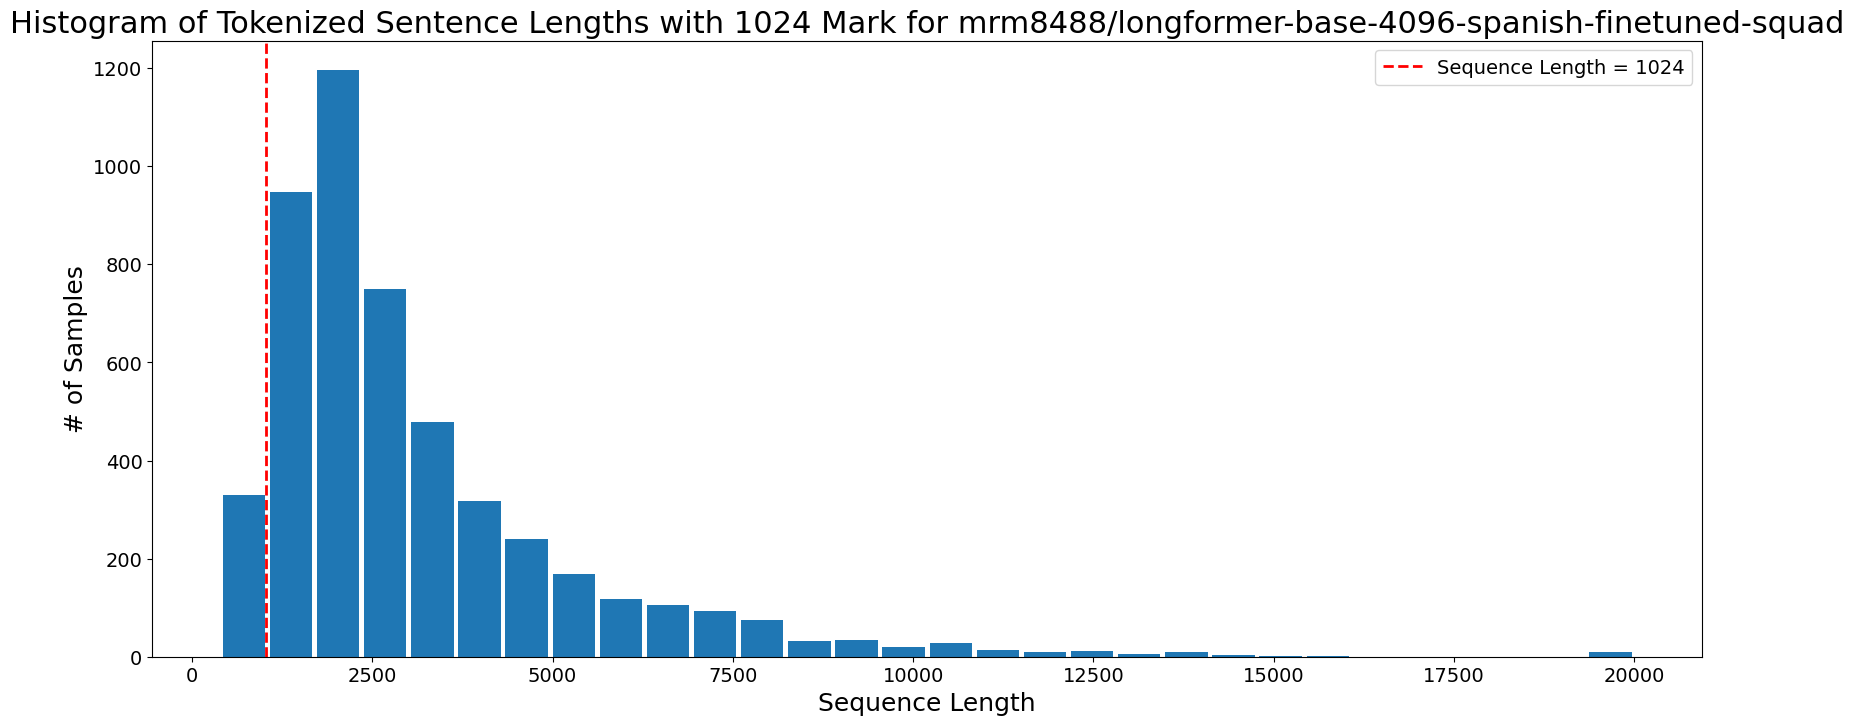

/tmp/ipykernel_18720/3423482186.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=22)


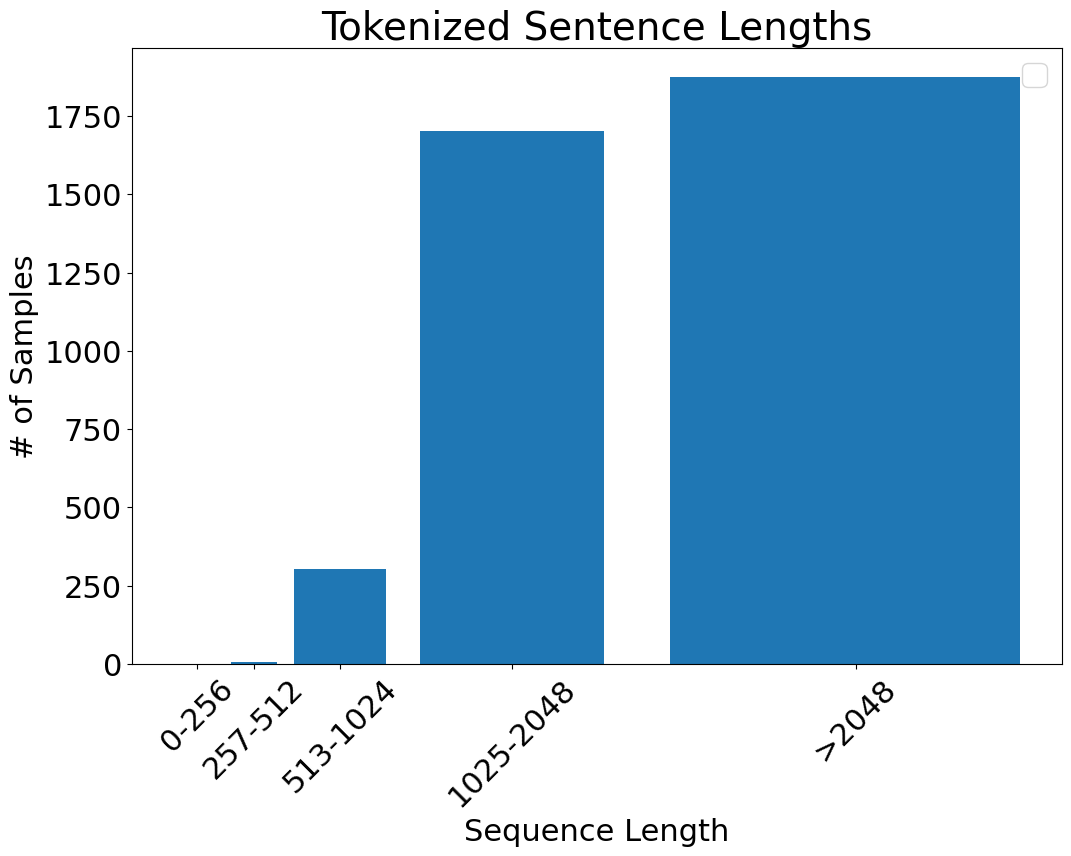

In [11]:
# Data for plotting
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]

# Adjust sequence lengths greater than 256
adjusted_lengths = [x if x <= 16384 else 20000 for x in token_sentence_length]  # Use 300 as a visual trick for '>256'

# Histogram with a vertical line at sequence length 128
plt.figure(figsize=(20, 8))
plt.hist(adjusted_lengths, bins=30, rwidth=0.9)  # You can adjust the bin width here
plt.axvline(x=1024, color='red', linestyle='dashed', linewidth=2, label='Sequence Length = 1024')
plt.xlabel('Sequence Length', fontsize=18)
plt.ylabel('# of Samples', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title(f'Histogram of Tokenized Sentence Lengths with 1024 Mark for {model_checkpoint}', fontsize=22)
plt.show()


# Histogram with adjusted binning
plt.figure(figsize=(12, 8))
bins = [0, 256, 512, 1024, 2048, 4000]  # Define custom bins, last bin visually separates '>256'
plt.hist(adjusted_lengths, bins=bins, rwidth=0.8, align='mid')

# Set the x-ticks to reflect the actual bins
# plt.xticks([32, 96, 160, 224, 278], ['0-64', '65-128', '129-192', '193-256', '>256'], rotation=45, fontsize=22)
plt.xticks([128, 384, 768, 1536, 3072], ['0-256', '257-512', '513-1024', '1025-2048', '>2048'], rotation=45, fontsize=22)

plt.xlabel('Sequence Length', fontsize=22)
plt.ylabel('# of Samples', fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)
plt.title('Tokenized Sentence Lengths', fontsize=28)
plt.show()

In [12]:
num_gr_128 = len(list(filter(lambda x: x>128, token_sentence_length)))
print('Number of sequences longer than 128:', num_gr_128)
percent_gr_128 = (num_gr_128/len(token_sentence_length))*100
print('Percentage of sequences longer than 128:', percent_gr_128)

Number of sequences longer than 128: 5000
Percentage of sequences longer than 128: 100.0
